In [3]:
import pandas as pd
import glob

def define_genre(row):
    """
    Function to estimate genre based on af_key, af_danceability, and af_energy.
    """
    if row['af_danceability'] > 0.7 and row['af_energy'] > 0.7:
        return 'Electronic'
    elif row['af_danceability'] > 0.6 and row['af_energy'] <= 0.7:
        return 'Pop'
    elif row['af_danceability'] <= 0.6 and row['af_energy'] > 0.6:
        return 'Rock'
    elif row['af_key'] in [1, 2, 3] and row['af_danceability'] < 0.5:
        return 'Classical'
    elif row['af_key'] in [8, 9, 10] and row['af_danceability'] > 0.5:
        return 'Hip-Hop'
    else:
        return 'Other'

# Load all files named "p_(#).csv" and combine them into a single DataFrame
file_paths = glob.glob('p_*.csv')
data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Apply the genre estimation function
data['Genre'] = data.apply(define_genre, axis=1)

# Save the updated dataset with the new Genre column
data.to_csv('spotify_combined_dataset_with_genres.csv', index=False)

print("Combined dataset saved as 'spotify_combined_dataset_with_genres.csv'")

Combined dataset saved as 'spotify_combined_dataset_with_genres.csv'


In [4]:
# Extract month and year from the date column if not already done
if 'Month' not in data.columns:
    data['Month'] = pd.to_datetime(data['date']).dt.to_period('M')

# Group by region, month, and genre to calculate the mean scores per genre
grouped = data.groupby(['region', 'Month', 'Genre'])[['af_danceability', 'af_energy']].mean()

# Find the best scoring genre per region per month
best_genres = grouped.reset_index().sort_values(['region', 'Month', 'af_danceability', 'af_energy'], ascending=[True, True, False, False])
best_genres = best_genres.groupby(['region', 'Month']).first().reset_index()

# Display the best scoring genres per month per region
print(best_genres)

# Optionally save the results to a CSV file
best_genres.to_csv('best_genres_per_month_per_region.csv', index=False)

print("Best scoring genres per month per region saved as 'best_genres_per_month_per_region.csv'")


         region    Month       Genre  af_danceability  af_energy
0     Argentina  2017-01  Electronic         0.792483   0.841483
1     Argentina  2017-02  Electronic         0.764143   0.840064
2     Argentina  2017-03  Electronic         0.760585   0.813102
3     Argentina  2017-04  Electronic         0.762953   0.828594
4     Argentina  2017-05  Electronic         0.766475   0.822544
...         ...      ...         ...              ...        ...
3689    Vietnam  2021-07  Electronic         0.767131   0.788409
3690    Vietnam  2021-08  Electronic         0.772668   0.773341
3691    Vietnam  2021-09  Electronic         0.770606   0.782549
3692    Vietnam  2021-10  Electronic         0.777629   0.801067
3693    Vietnam  2021-11  Electronic         0.779610   0.806242

[3694 rows x 5 columns]
Best scoring genres per month per region saved as 'best_genres_per_month_per_region.csv'


In [5]:
# Calculate the number of unique regions (countries)
unique_countries = best_genres['region'].nunique()

print(f"The number of unique countries in the dataset is: {unique_countries}")


The number of unique countries in the dataset is: 69


In [6]:
# Load the original dataset with genres
data_with_genres = pd.read_csv('spotify_combined_dataset_with_genres.csv')

# Ensure the Month column is created
data_with_genres['Month'] = pd.to_datetime(data_with_genres['date']).dt.to_period('M')

# Group by region, Month, and Genre to count the number of records
records_per_genre = data_with_genres.groupby(['region', 'Month', 'Genre']).size().reset_index(name='Record_Count')

# Save the results to a CSV file
records_per_genre.to_csv('records_per_genre_per_month_per_country.csv', index=False)

# Display the resulting dataset
print(records_per_genre)

print("The amount of records per genre per month per country has been saved as 'records_per_genre_per_month_per_country.csv'")


          region    Month       Genre  Record_Count
0      Argentina  2017-01  Electronic           145
1      Argentina  2017-01     Hip-Hop            62
2      Argentina  2017-01       Other            95
3      Argentina  2017-01         Pop           316
4      Argentina  2017-01        Rock            58
...          ...      ...         ...           ...
21644    Vietnam  2021-11  Electronic           833
21645    Vietnam  2021-11     Hip-Hop           186
21646    Vietnam  2021-11       Other           939
21647    Vietnam  2021-11         Pop          3062
21648    Vietnam  2021-11        Rock           479

[21649 rows x 4 columns]
The amount of records per genre per month per country has been saved as 'records_per_genre_per_month_per_country.csv'


In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('spotify_combined_dataset_with_genres.csv')

# Ensure the Month column exists
data['Month'] = pd.to_datetime(data['date']).dt.to_period('M')

# Group by region, month, and genre, and count the number of records
popularity_table = data.groupby(['region', 'Month', 'Genre']).size().reset_index(name='Record_Count')

# Pivot the table to make genres columns
popularity_pivot = popularity_table.pivot_table(index=['region', 'Month'],
                                                columns='Genre',
                                                values='Record_Count',
                                                fill_value=0).reset_index()

# Display the pivoted table
print(popularity_pivot)

# Save the table to a CSV file (optional)
popularity_pivot.to_csv('popularity_per_genre_per_country.csv', index=False)


Genre     region    Month  Classical  Electronic  Hip-Hop   Other     Pop  \
0      Argentina  2017-01        0.0       145.0     62.0    95.0   316.0   
1      Argentina  2017-02        0.0       265.0     82.0   141.0   369.0   
2      Argentina  2017-03        0.0       518.0    196.0   251.0   548.0   
3      Argentina  2017-04        0.0       688.0    138.0   332.0   648.0   
4      Argentina  2017-05        0.0       774.0    116.0   430.0   882.0   
...          ...      ...        ...         ...      ...     ...     ...   
3689     Vietnam  2021-07      219.0       839.0    295.0  1061.0  3070.0   
3690     Vietnam  2021-08      151.0       791.0    294.0  1128.0  3121.0   
3691     Vietnam  2021-09      132.0       792.0    206.0  1065.0  3059.0   
3692     Vietnam  2021-10      113.0       852.0    230.0   978.0  3140.0   
3693     Vietnam  2021-11       93.0       833.0    186.0   939.0  3062.0   

Genre   Rock  
0       58.0  
1       99.0  
2      211.0  
3      218.0  


In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('spotify_combined_dataset_with_genres.csv')

# Ensure the Month column exists
data['Month'] = pd.to_datetime(data['date']).dt.to_period('M')

# Determine the first appearance of each genre in each region
first_appearance = data.groupby(['Genre', 'region'])['Month'].min().reset_index()
first_appearance = first_appearance.rename(columns={'Month': 'First_Appearance'})

# Add a column to calculate the spread over time
migration_speed = first_appearance.groupby('Genre')['First_Appearance'].agg(['min', 'max']).reset_index()
migration_speed['Migration_Duration'] = (migration_speed['max'] - migration_speed['min']).apply(lambda x: x.n)

# Create a summary table showing migration speed for each genre
migration_speed_table = migration_speed[['Genre', 'min', 'max', 'Migration_Duration']]
migration_speed_table = migration_speed_table.rename(
    columns={
        'min': 'Earliest_Adoption',
        'max': 'Latest_Adoption',
        'Migration_Duration': 'Duration (Months)'
    }
)

# Display the migration speed table
print(migration_speed_table)

# Save the table to a CSV file (optional)
migration_speed_table.to_csv('migration_speed_per_genre.csv', index=False)


        Genre Earliest_Adoption Latest_Adoption  Duration (Months)
0   Classical           2017-01         2021-02                 49
1  Electronic           2017-01         2021-02                 49
2     Hip-Hop           2017-01         2021-02                 49
3       Other           2017-01         2021-02                 49
4         Pop           2017-01         2021-02                 49
5        Rock           2017-01         2021-02                 49


In [11]:
# Load the dataset
data = pd.read_csv('spotify_combined_dataset_with_genres.csv')

# Group by region and genre to count occurrences
popularity_counts = data.groupby(['region', 'Genre']).size().reset_index(name='Count')

# Calculate total counts per region
total_counts = popularity_counts.groupby('region')['Count'].transform('sum')

# Compute the percentage for each genre per country
popularity_counts['Percentage'] = (popularity_counts['Count'] / total_counts) * 100

# Display the resulting table in Jupyter Notebook
from IPython.display import display
display(popularity_counts)


,region,Genre,Count,Percentage
0,Argentina,Classical,687,0.241726
1,Argentina,Electronic,101182,35.601641
2,Argentina,Hip-Hop,9115,3.207181
3,Argentina,Other,36565,12.865668
4,Argentina,Pop,116102,40.851354
...,...,...,...,...
409,Vietnam,Electronic,29778,13.124422
410,Vietnam,Hip-Hop,12501,5.509718
411,Vietnam,Other,50606,22.304200
412,Vietnam,Pop,105199,46.365640


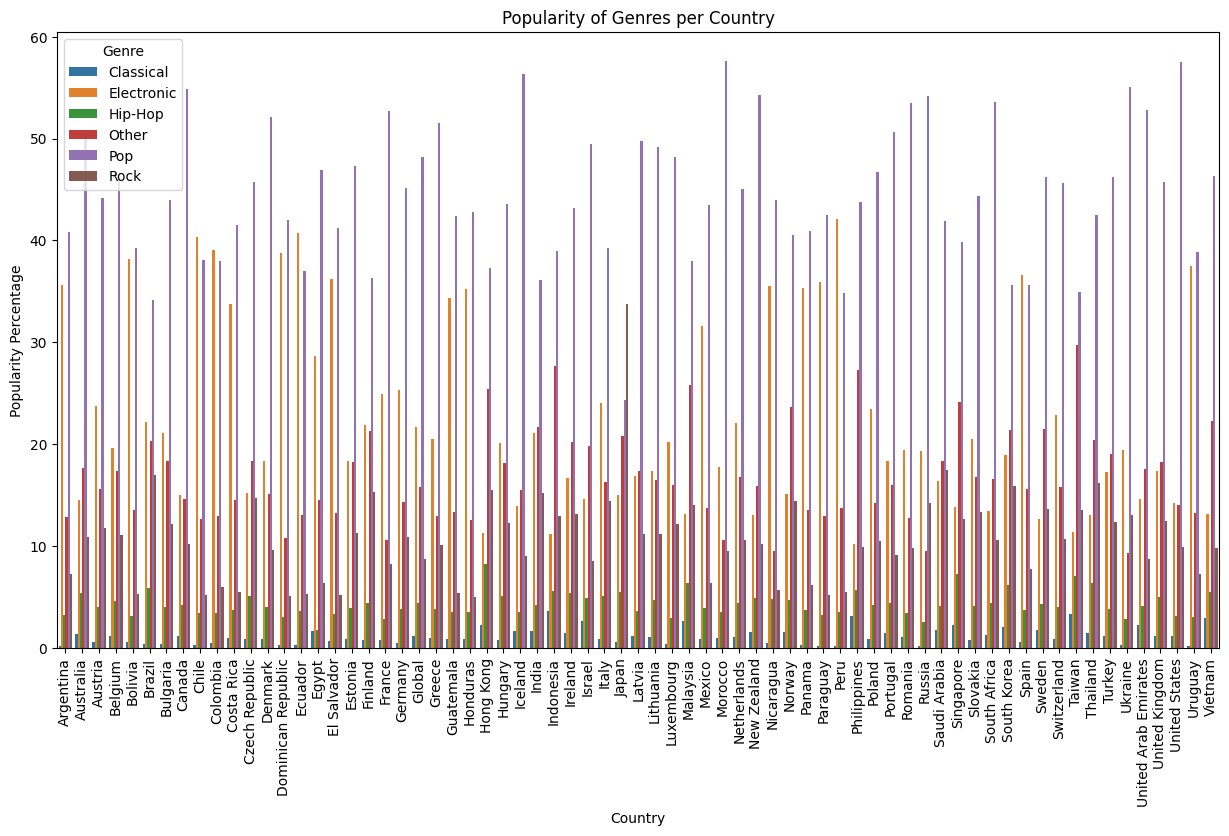

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Popularity of genres per country
plt.figure(figsize=(15, 8))
sns.barplot(data=popularity_counts, x='region', y='Percentage', hue='Genre')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Popularity Percentage')
plt.title('Popularity of Genres per Country')
plt.legend(title='Genre')
plt.show()


In [18]:
# Calculate quartiles within each country based on popularity percentage
popularity_counts['Quartile'] = popularity_counts.groupby('region')['Percentage'].transform(
    lambda x: pd.qcut(x, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
)

# Ensure there are no NaN values in the Quartile column
popularity_counts = popularity_counts.dropna(subset=['Quartile'])

# Find the most popular genre in each quartile per country
quartile_most_popular = popularity_counts.loc[popularity_counts.groupby(['region', 'Quartile'])['Percentage'].idxmax()]

# Select relevant columns for the final table
quartile_table = quartile_most_popular[['region', 'Quartile', 'Genre']]

# Display the table
tools.display_dataframe_to_user(name="Most Popular Genre per Quartile per Country", dataframe=quartile_table)


<ipython-input-18-7ecd526b590e>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_most_popular = popularity_counts.loc[popularity_counts.groupby(['region', 'Quartile'])['Percentage'].idxmax()]


NameError: name 'tools' is not defined